In [1]:
import pandas as pd
Titanic = pd.read_csv('titanic_train.csv').drop(['Cabin','Ticket'], axis = 1)
Titanic = Titanic.set_index('PassengerId')
Titanic.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S


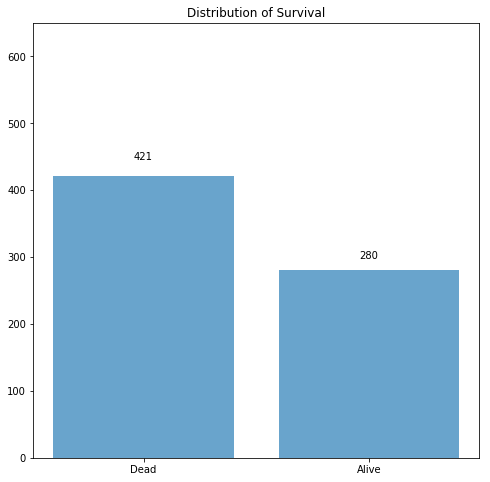

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from Prep import titanic, autolabel
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Bar plot of survival distribution
plt.figure(figsize=(8,8))
barr = plt.bar( titanic.Survived.value_counts().index,  titanic.Survived.value_counts(), alpha = 0.67, )
plt.title('Distribution of Survival')
autolabel(barr, plt.gca())
plt.xticks([0,1], ['Dead','Alive'])

plt.ylim((0,650))
barr = plt.gcf()
plt.rcParams["figure.figsize"] = (12,6)

plt.show()

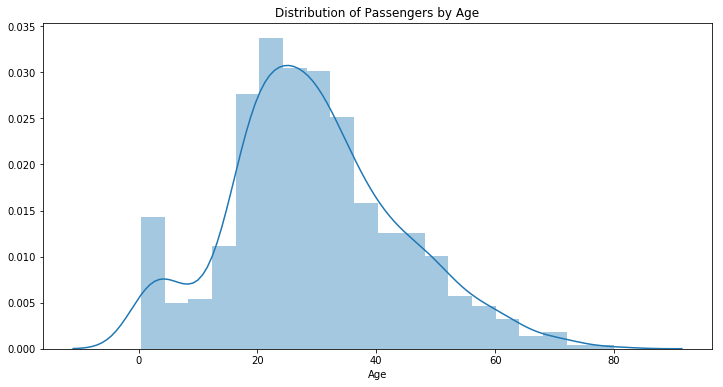

In [3]:
plt.figure(figsize=(12,6))
sns.distplot(titanic.Age, )
plt.title('Distribution of Passengers by Age')
plt.show()

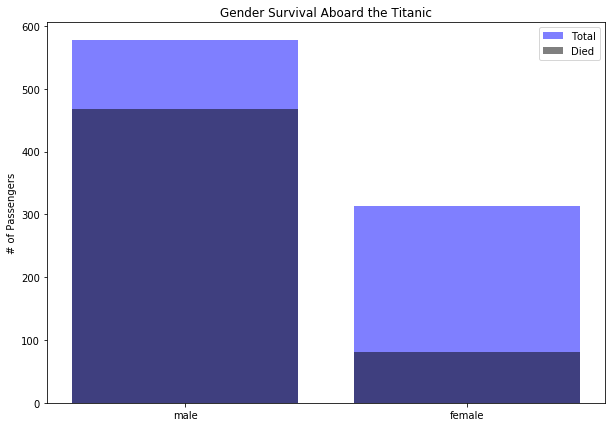

In [4]:
dead_subframe = Titanic[Titanic.Survived == 0]

plt.figure(figsize = (10,7))
plt.bar( Titanic['Sex'].value_counts().index,  Titanic['Sex'].value_counts(), label = 'alive', color = 'blue', alpha = 0.5 )
plt.bar( dead_subframe['Sex'].value_counts().index,  dead_subframe['Sex'].value_counts(), label = 'dead', color = 'black', alpha = 0.5 )
plt.legend(['Total','Died'])
plt.title('Gender Survival Aboard the Titanic')
plt.ylabel('# of Passengers')

plt.show()

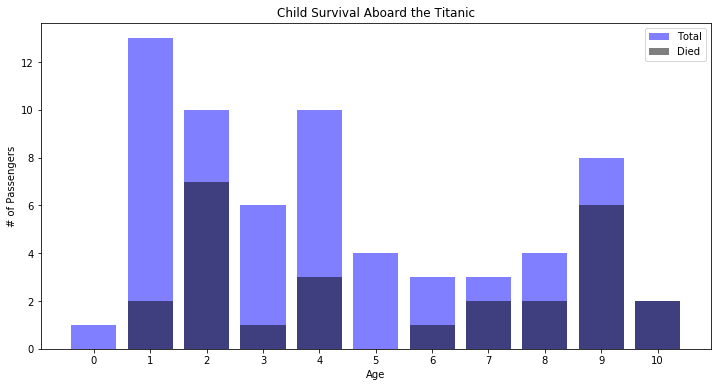

In [5]:
babies_subframe = Titanic[Titanic['Age'] <= 10].round(0)
sad = babies_subframe[babies_subframe.Survived==0]

plt.figure(figsize=(12, 6))
plt.bar( babies_subframe['Age'].value_counts().index,  babies_subframe['Age'].value_counts(), label = 'dead', color = 'blue', alpha = 0.5 )
plt.bar( sad['Age'].value_counts().index,  sad['Age'].value_counts(), label = 'dead', color = 'black', alpha = 0.5 )
plt.legend(['Total','Died'])
plt.title('Child Survival Aboard the Titanic')
plt.xlabel('Age')
plt.ylabel('# of Passengers')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])

plt.show()


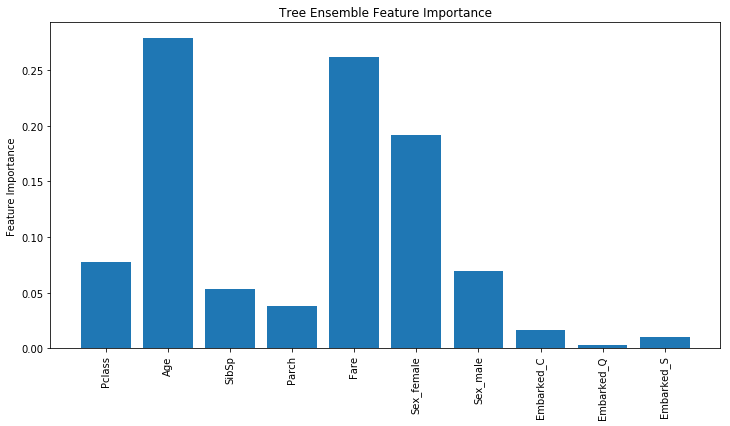

In [6]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
X, y = titanic.iloc[:,1:], titanic.iloc[:,0]
df = titanic

feat_labels = df.columns[1:]
t = RandomForestClassifier()
t.fit(X, y)
plt.figure(figsize=(12,6))
plt.bar(range(len(feat_labels)), t.feature_importances_)
plt.xticks(range(len(feat_labels)), feat_labels, rotation =90)
plt.ylabel('Feature Importance')
plt.title('Tree Ensemble Feature Importance')
plt.show()

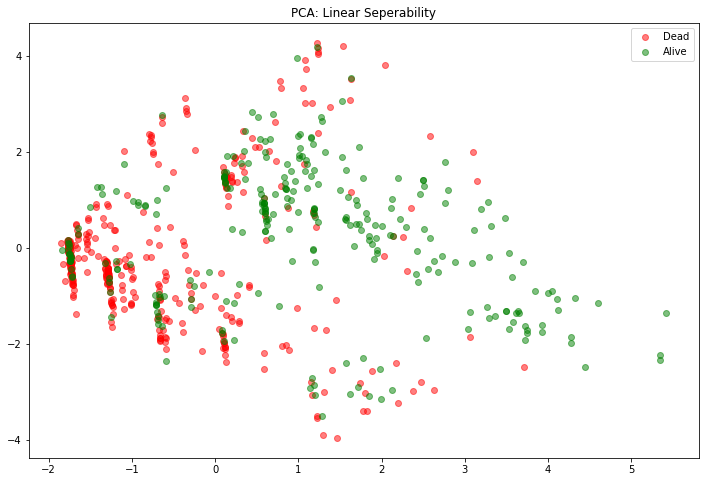

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_pca1 = X.copy()
X_pca1 = StandardScaler().fit_transform(X_pca1)

#instantiate PCA
pca = PCA(n_components = 2)
X_redu1 = pca.fit_transform(X_pca1)

died1 = X_redu1[y == 0]
live1 = X_redu1[y == 1]
comp =[0,1]

fig = plt.figure(figsize = (12,8))
plt.scatter(died1[:,0].reshape(1,-1), died1[:,1].reshape(1,-1), c = 'red', label = 'Dead', alpha = 0.5)
plt.scatter(live1[:,0].reshape(1,-1), live1[:,1].reshape(1,-1), c = 'green', label = 'Survived', alpha = 0.5)
plt.title('PCA: Linear Seperability')
plt.legend(['Dead', 'Alive'])

plt.show()

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [9]:
svc = GradientBoostingClassifier()
sc = StandardScaler()

#Without Feature Selection
pipe = Pipeline([('sc', sc), ('clf', svc)])
fit_params = {'clf__loss': ['deviance', 'exponential'],
             'clf__learning_rate': [0.001, 0.01, 0.1],
             'clf__max_depth': [4,5,6,7],
             'clf__min_samples_split': [ 4, 5, 6, 7]}

gs = GridSearchCV(pipe, fit_params, n_jobs = -1, cv = 10, return_train_score = True)
gs.fit(X_redu1, y)

print('Best performing classifier parameters (score {}):\n{}'.format(gs.best_score_,gs.best_params_))

Best performing classifier parameters (score 0.7960057061340942):
{'clf__learning_rate': 0.01, 'clf__loss': 'exponential', 'clf__max_depth': 5, 'clf__min_samples_split': 5}


In [10]:

from VisualFuncs import VDR


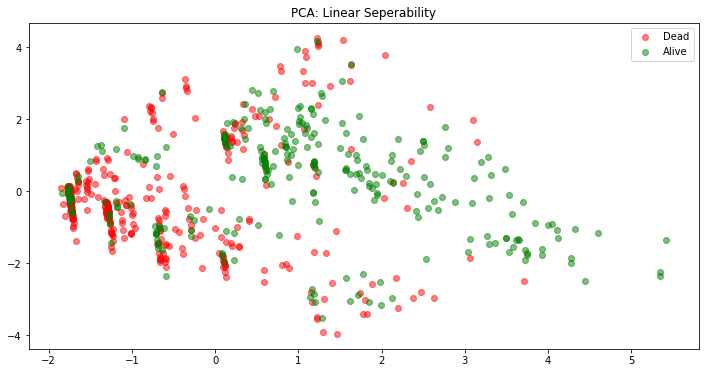

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


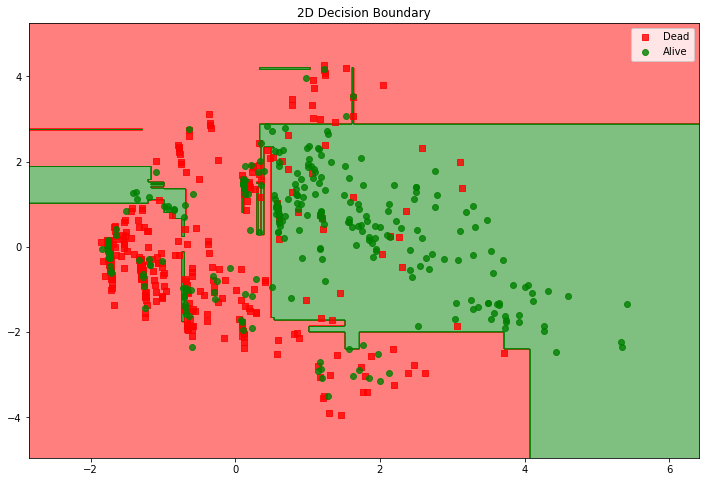

In [11]:
pipe.set_params(clf__learning_rate = gs.best_params_['clf__learning_rate'])
pipe.set_params(clf__loss = gs.best_params_['clf__loss'])
pipe.set_params(clf__max_depth = gs.best_params_['clf__max_depth'])
pipe.set_params(clf__min_samples_split = gs.best_params_['clf__min_samples_split'])
pipe.fit(X_redu1, y)

fig = plt.figure(figsize = (12,6))
plt.scatter(died1[:,0].reshape(1,-1), died1[:,1].reshape(1,-1), c = 'red', label = 'Dead', alpha = 0.5)
plt.scatter(live1[:,0].reshape(1,-1), live1[:,1].reshape(1,-1), c = 'green', label = 'Survived', alpha = 0.5)
plt.title('PCA: Linear Seperability')
plt.legend(['Dead', 'Alive'])

plt.show()
VDR(X_redu1, y , pipe, class_names = ['Dead', 'Alive'])
plt.title('2D Decision Boundary')
plt.show()

In [12]:
d = {'Names':["Abhishek", "Rushikesh", "Vijay", "Shiva", "Bhakti", "Sayali", "Ujwal", "Ashish", "Dev","Anvisha"],
     'Pclass':[2,2,2,2,2,2,2,2,2,2],
     'Age': [21, 19,20,20,21,21,19,21,19,20], 
     'SibSp':[0,0,0,0,0,0,0,0,0,0],
     'Parch': [0,0,0,0,0,0,0,0,0,0],
     'Fare':[28,28,28,28,28,28,28,28,28,28], 
     'Sex_female':[0,0,0,0,1,1,0,0,0,1], 
     'Sex_male': [1,1,1,1,0,0,1,1,1,0],
     'Embarked_C':[0,0,0,0,0,0,0,0,0,0], 
     'Embarked_Q':[1,1,1,1,1,0,0,0,0,0], 
     'Embarked_S':[0,0,0,0,0,1,1,1,1,1]}

us = pd.DataFrame(data =d)
us

,Names,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,Abhishek,2,21,0,0,28,0,1,0,1,0
1,Rushikesh,2,19,0,0,28,0,1,0,1,0
2,Vijay,2,20,0,0,28,0,1,0,1,0
3,Shiva,2,20,0,0,28,0,1,0,1,0
4,Bhakti,2,21,0,0,28,1,0,0,1,0
5,Sayali,2,21,0,0,28,1,0,0,0,1
6,Ujwal,2,19,0,0,28,0,1,0,0,1
7,Ashish,2,21,0,0,28,0,1,0,0,1
8,Dev,2,19,0,0,28,0,1,0,0,1
9,Anvisha,2,20,0,0,28,1,0,0,0,1


In [13]:
svc = GradientBoostingClassifier()
sc = StandardScaler()

#Without Feature Selection
pipe = Pipeline([('sc', sc), ('clf', svc)])
fit_params = {'clf__loss': ['deviance', 'exponential'],
             'clf__learning_rate': [0.001, 0.01, 0.1, ],
             'clf__max_depth': [3,4,5,6,],
             'clf__min_samples_split': [2,3,4,5]}

gs = GridSearchCV(pipe, fit_params, n_jobs = -1, cv = 10, return_train_score = True)
gs.fit(X, y)

pipe.set_params(clf__loss = gs.best_params_['clf__loss'])
pipe.set_params(clf__learning_rate = gs.best_params_['clf__learning_rate'])
pipe.set_params(clf__max_depth = gs.best_params_['clf__max_depth'])
pipe.set_params(clf__min_samples_split = gs.best_params_['clf__min_samples_split'])
pipe.fit(X, y)
print('Best performing classifier parameters (score {}):\n{}'.format(gs.best_score_,gs.best_params_))

Best performing classifier parameters (score 0.8273894436519258):
{'clf__learning_rate': 0.1, 'clf__loss': 'deviance', 'clf__max_depth': 3, 'clf__min_samples_split': 2}


In [14]:
pred = pipe.predict(us.iloc[:,1:])

In [15]:
us['Survived']=pred
us = us.iloc[:,[11,0,1,2,3,4,5,6,7,8,9,10]]
us['Survived']=us['Survived'].map({0:'Dead', 1:'Alive'})
us.iloc[:,:2]

,Survived,Names
0,Dead,Abhishek
1,Dead,Rushikesh
2,Dead,Vijay
3,Dead,Shiva
4,Alive,Bhakti
5,Alive,Sayali
6,Dead,Ujwal
7,Dead,Ashish
8,Dead,Dev
9,Alive,Anvisha
